# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [ ]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib.pyplot для работы с графиками
import numpy as np # импорт библиотеки numpy

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # чтение файла с данными и сохранение в calls

In [3]:
calls.head() # получение первых 5 строк таблицы calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info() # получение общей информации о данных в таблице calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
internet = pd.read_csv('/datasets/internet.csv')# чтение файла с данными и сохранение в internet

In [6]:
internet.head() # получение первых 5 строк таблицы internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info() # получение общей информации о данных в таблице internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
messages = pd.read_csv('/datasets/messages.csv')# чтение файла с данными и сохранение в messages

In [9]:
messages.head() # получение первых 5 строк таблицы messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info() # получение общей информации о данных в таблице messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
tariffs = pd.read_csv('/datasets/tariffs.csv') # чтение файла с данными и сохранение в tariffs

In [12]:
tariffs.head() # получение первых 2 строк таблицы tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info() # получение общей информации о данных в таблице tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
users = pd.read_csv('/datasets/users.csv') # чтение файла с данными и сохранение в usersusers

In [15]:
users.head() # получение первых 5 строк таблицы users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
users.info() # получение общей информации о данных в таблице users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

Согласно документации к данным: 

Таблица `users` (информация о пользователях):

* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tariff` — название тарифного плана.

Таблица `calls` (информация о звонках):

* `id` — уникальный номер звонка;
* `call_date` — дата звонка;
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок.

Таблица `messages` (информация о сообщениях):

* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение.

Таблица `internet` (информация об интернет-сессиях):

* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя.

Таблица `tariffs` (информация о тарифах):

* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

Описание тарифов

Тариф `Смарт`

Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф `Ультра`

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Во всех пяти талбицах отсуствует пропуски,за исключение таблицы `users`,в которой присуствует пропускив колонке `churn_date`. Отсуствие значения обусловлено тем, что пользователь не прекратил использовать тариф на момент выгрузки данных.

Для  дальнейшего анализа необходимо преобразовать данные в таких столбцах как  `duration` (округлить до целых чисел) , `reg_date`(изменить тип данных), `mb_used` (перевод единицы измерения)

## Предобработка данных

In [17]:
calls['duration'] =  np.ceil(calls['duration']) # округление минут в большую сторону и меняем тип данных на int

In [18]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format = '%Y-%m-%d') # изменение формата даты и время

In [19]:
users['month_reg'] = users['reg_date'].dt.month # создание столбца 'month_reg' и внесение в него месяца подлючения тарифа

In [20]:
calls['call_date'] =  pd.to_datetime(calls['call_date'],format = '%Y-%m-%d') # изменение формата даты и время

In [21]:
calls['month'] = calls['call_date'].dt.month # создание столбца 'month' и внесение в него месяца осуществеления звонка

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d') # изменение формата даты и время

In [23]:
messages['month'] = messages['message_date'].dt.month # создание столбца 'month' и внесение в него месяца осуществеления отправления смс

In [24]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format = '%Y-%m-%d') # изменение формата даты и время

In [25]:
internet['month'] = internet['session_date'].dt.month # создание столбца 'month' и внесение в него месяца использования интернета

In [26]:
internet = internet.drop(['Unnamed: 0'], axis = 1) # удаления стоолбца 'Unnamed: 0' из датафрейма internet

In [27]:
calls = calls.groupby(['user_id', 'month']).agg({'duration':['count', 'sum',]}).reset_index() # группируем данные по столбцам 'user_id', 'month' 
# и подчитываем количесвто и сумму минут  потраченные на звонки звонков

In [28]:
calls.columns = ['user_id','month','duration_count','duration_sum'] # переименовали столбцы в датафрейме calls

In [29]:
calls # вывод на экран датафрейма calls

,user_id,month,duration_count,duration_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


In [30]:
internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()# группируем данные по столбцам 'user_id', 'month' 
# и подчитываем сумму мегабайт потраченные на использования интернета

In [31]:
internet  # вывод на экран датафрейма internet 

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [32]:
messages = messages.groupby(['user_id', 'month'])['id'].count().reset_index()# группируем данные по столбцам 'user_id', 'month' 
# и подчитываем сумму смс

In [33]:
messages # вывод на экран датафрейма messages

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [34]:
df = calls.merge(messages,on=['user_id','month'], how = 'outer')# объединяем два датафрейма в одно таблицу

In [35]:
df # вывод на экран датафрейма df

,user_id,month,duration_count,duration_sum,id
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [36]:
df = df.merge(internet,on=['user_id','month'],how = 'outer')# объединяем два датафрейма в одно таблицу

In [37]:
df # вывод на экран датафрейма df

,user_id,month,duration_count,duration_sum,id,mb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30
3210,1489,10,NaN,NaN,21.0,19559.44
3211,1489,11,NaN,NaN,20.0,17491.56
3212,1489,12,NaN,NaN,35.0,17322.51


In [38]:
df = df.merge(users,on = 'user_id', how = 'left')#  к текущему датафрейму дополняем фатафрейм users

In [39]:
df # вывод на экран датафрейма df

,user_id,month,duration_count,duration_sum,id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg
0,1000,5,22.0,159.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1000,6,43.0,172.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,1000,7,47.0,340.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1000,8,52.0,408.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,1000,9,58.0,466.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8
3210,1489,10,NaN,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8
3211,1489,11,NaN,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8
3212,1489,12,NaN,NaN,35.0,17322.51,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8


In [40]:
df = df.drop(['age','first_name','last_name','reg_date','month_reg'], axis = 1) # удаления стоолбцы  из датафрейма df

In [41]:
df # вывод на экран датафрейма df

,user_id,month,duration_count,duration_sum,id,mb_used,churn_date,city,tariff
0,1000,5,22.0,159.0,22.0,2253.49,NaN,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23233.77,NaN,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14003.64,NaN,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14055.93,NaN,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,14568.91,NaN,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,NaN,Санкт-Петербург,smart
3210,1489,10,NaN,NaN,21.0,19559.44,NaN,Санкт-Петербург,smart
3211,1489,11,NaN,NaN,20.0,17491.56,NaN,Санкт-Петербург,smart
3212,1489,12,NaN,NaN,35.0,17322.51,NaN,Санкт-Петербург,smart


In [67]:
df.shape

(3214, 10)

In [68]:
df.user_id.nunique()

498

In [42]:
df['mb_used'] = (df['mb_used'] / 1024) # перевели колонку 'mb_used' в другую еденицу измерения

In [43]:
df['mb_used'] = np.ceil(df['mb_used']) # округлили в большую сторону

In [44]:
df.columns = ['user_id','month','duration_count','duration_sum','message_sum','gb_used','churn_date','city','tariff']# переименовали столбцы

In [45]:
df['city'] = df['city'].str.lower()# приведение строк в колонке к нижнему регистру

In [46]:
df # вывод на экран датафрейма df

,user_id,month,duration_count,duration_sum,message_sum,gb_used,churn_date,city,tariff
0,1000,5,22.0,159.0,22.0,3.0,NaN,краснодар,ultra
1,1000,6,43.0,172.0,60.0,23.0,NaN,краснодар,ultra
2,1000,7,47.0,340.0,75.0,14.0,NaN,краснодар,ultra
3,1000,8,52.0,408.0,81.0,14.0,NaN,краснодар,ultra
4,1000,9,58.0,466.0,57.0,15.0,NaN,краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0,NaN,санкт-петербург,smart
3210,1489,10,NaN,NaN,21.0,20.0,NaN,санкт-петербург,smart
3211,1489,11,NaN,NaN,20.0,18.0,NaN,санкт-петербург,smart
3212,1489,12,NaN,NaN,35.0,17.0,NaN,санкт-петербург,smart


In [47]:
def revenue(row): # функция для подсчета выручки по тарифам 
    if row['tariff'] == 'smart':
        if row['duration_sum'] > 500: 
            calls = (row['duration_sum'] - 500) * 3
        else:
            calls = 0
        
        if row['message_sum'] > 50: 
             sms = (row['message_sum'] - 50) * 3
        else:
            sms = 0
        
        if row['gb_used'] > 15: 
            inet =  (row['gb_used'] - 15) * 200
        else:
            inet = 0
            
        rev = 550 + calls + sms + inet   
        
        return rev
    
    if row['tariff'] == 'ultra': 
        
        if row['duration_sum'] > 3000:
             calls = (row['duration_sum'] - 3000) * 1
        else:
            calls = 0
        
        if row['message_sum'] > 1000: 
            sms = (row['message_sum'] - 1000) * 1
        else:
            sms = 0
        
        if row['gb_used'] > 30: 
             inet = (row['gb_used'] - 30) * 150        
        else:
            inet = 0
            
        rev = 1950 + calls + sms + inet
        
        return  rev  

In [48]:
df['revenue'] = df.apply(revenue, axis=1) # с помощью функции apply принимаем функцию revenue(row)

In [49]:
df['revenue'] = df['revenue'].astype('int') # изменения типа данных

In [69]:
df['revenue'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

In [50]:
df.info() # вывод информации по датафрейму

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 10 columns):
user_id           3214 non-null int64
month             3214 non-null int64
duration_count    3174 non-null float64
duration_sum      3174 non-null float64
message_sum       2717 non-null float64
gb_used           3203 non-null float64
churn_date        187 non-null object
city              3214 non-null object
tariff            3214 non-null object
revenue           3214 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 276.2+ KB


In [51]:
df.isna().sum() # подсчёт пропусков

user_id              0
month                0
duration_count      40
duration_sum        40
message_sum        497
gb_used             11
churn_date        3027
city                 0
tariff               0
revenue              0
dtype: int64

### Вывод

Для таблица `calls` произвели изменения. Теперь в этой таблице данные по месяцам и идентификационный номер пользователя сгруппирован по количеству звонков и продолжительности общения,округленного до минут.

Таблица `internet` аналогично  сгруппирована  только по использованных гигабайтах интернета и округлена в большую сторону.

В таблице `message` находятся данные группировки месяца и  идентификационного номера пользователя по использованию смс.

Объединили `calls`,`internet`, `message`, `users` датафреймы в один (`df`)

 Добавили в датафрейм `df` столбец `revenue` ,в котором указана выручка с каждого пользователя.

В столбцах `duration_count`, `duration_sum` ,`message_sum`, `gb_used` обнаружены пропуски. Объясняется это тем, что пользователь предпочел вообще не использовать полностью предоставленный лимит, который входит в пакет при оплате тарифа.

## Исследовательский анализ данных

In [52]:
df_smart = df.query('tariff == "smart"') # срез данных по значению "smart"

In [53]:
df_ultra = df.query('tariff == "ultra"') # срез данных по значению "smart"

In [54]:
df_smart.describe() # просмотр статистических данных

,user_id,month,duration_count,duration_sum,message_sum,gb_used,revenue
count,2229.000000,2229.000000,2223.000000,2223.000000,1922.000000,2228.000000,2229.000000
mean,1246.506505,8.346792,58.621233,419.062978,38.716441,16.336176,1289.973531
std,146.119496,2.920316,25.796101,189.325618,26.787949,5.737923,818.404367
min,1001.000000,1.000000,1.000000,0.000000,1.000000,0.000000,550.000000
25%,1121.000000,6.000000,40.000000,285.000000,17.000000,13.000000,550.000000
50%,1239.000000,9.000000,60.000000,423.000000,34.000000,17.000000,1023.000000
75%,1376.000000,11.000000,76.000000,545.500000,55.000000,20.000000,1750.000000
max,1499.000000,12.000000,198.000000,1435.000000,143.000000,38.000000,6770.000000


По тарифу смарт:
* В колонке `duration_count` среднее значение равно 58.62, стандартное отклонение 25.79;
* В колонке `duration_sum` среднее значение равно 419.06, стандартное отклонение 189.32;
* В колонке `message_sum` среднее значение равно 38.71, стандартное отклонение 26.78;
* В колонке `gb_used` среднее значение равно 16.33, стандартное отклонение 5.73.

In [55]:
np.var(df_smart) # расчет дисперсии для датафрейма df_smart

user_id            21341.328468
month                  8.524419
duration_count       665.139486
duration_sum       35828.065310
message_sum          717.220843
gb_used               32.908979
revenue           669485.220923
dtype: float64

In [56]:
df_ultra.describe() # просмотр статистических данных

,user_id,month,duration_count,duration_sum,message_sum,gb_used,revenue
count,985.000000,985.000000,951.000000,951.000000,795.000000,975.000000,985.000000
mean,1263.094416,8.250761,76.016824,545.451104,61.161006,19.694359,2070.152284
std,140.694908,2.871762,42.403348,306.925754,45.931026,9.702924,376.187114
min,1000.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000
25%,1143.000000,6.000000,43.000000,310.000000,24.000000,12.000000,1950.000000
50%,1277.000000,9.000000,75.000000,528.000000,51.000000,19.000000,1950.000000
75%,1381.000000,11.000000,105.000000,756.500000,87.500000,27.000000,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,49.000000,4800.000000


По тарифу ультра:
* В колонке `duration_count` среднее значение равно 76.01, стандартное отклонение 42.40;
* В колонке `duration_sum` среднее значение равно 545.45, стандартное отклонение 306.92;
* В колонке `message_sum` среднее значение равно 61.16, стандартное отклонение 45.93;
* В колонке `gb_used` среднее значение равно 19.69, стандартное отклонение 9.70.

In [57]:
np.var(df_ultra) # расчет дисперсии для датафрейма df_ultra

user_id            19774.960629
month                  8.238642
duration_count      1796.153240
duration_sum       94104.361174
message_sum         2107.005524
gb_used               94.050173
revenue           141373.073256
dtype: float64

In [58]:
%config InlineBackend.figure_format = 'retina'# графики сделали лучше

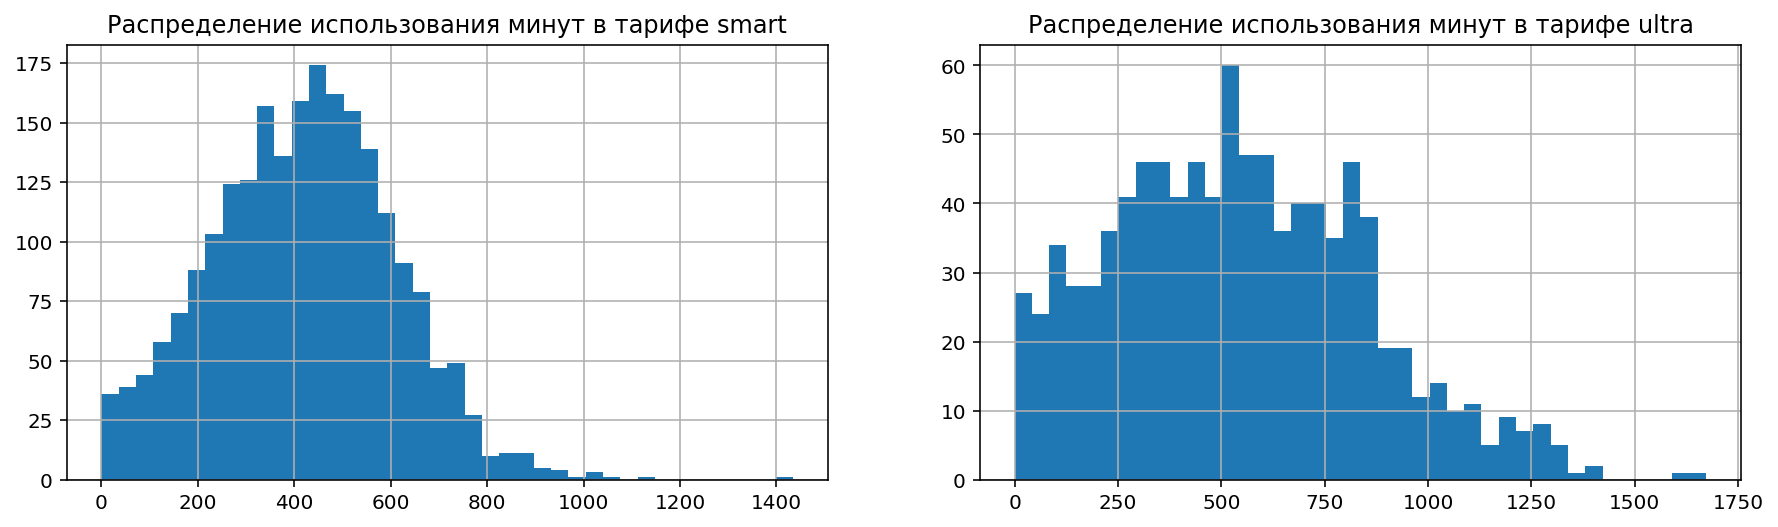

In [59]:
fig, axes = plt.subplots(1,2,figsize=(15,4)) # постоение гистрограммы 

df_smart['duration_sum'].hist(bins=40, ax=axes[0])
df_ultra['duration_sum'].hist(bins=40, ax=axes[1])
axes[0].set_title('Распределение использования минут в тарифе smart')
axes[1].set_title('Распределение использования минут в тарифе ultra')

plt.show()

По гистограмма видно ,что распределении использования минут находится нормальное распределение. Мода по тарифу смарт находится в диапозоне 450 - 500 минут.Таких значений чуть больше 250. В свою очередь по тарифу ультра мода чуть больше в диапозоне от 500 до 550. Но значений входящих в этот диапозон меньше и равно 70.

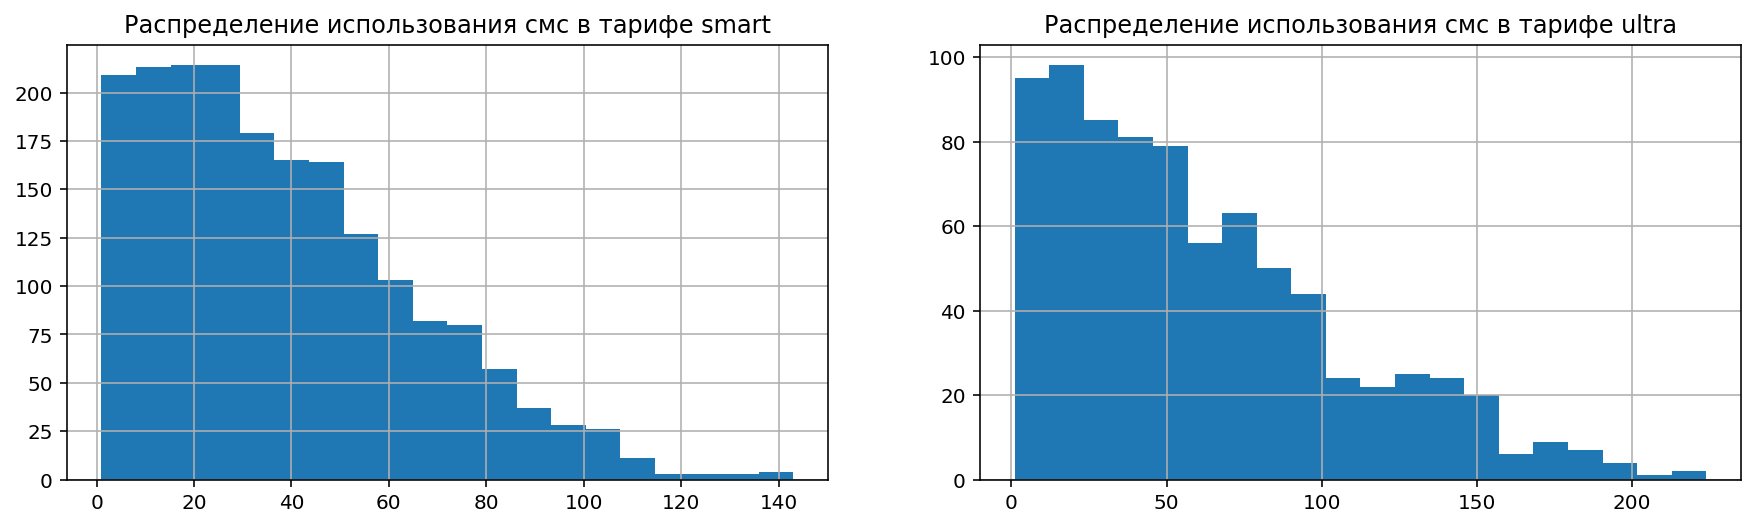

In [60]:
fig, axes = plt.subplots(1,2,figsize=(15,4))# постоение гистрограммы 

df_smart['message_sum'].hist(bins=20, ax=axes[0])
df_ultra['message_sum'].hist(bins=20, ax=axes[1])

axes[0].set_title('Распределение использования смс в тарифе smart')
axes[1].set_title('Распределение использования смс в тарифе ultra')

plt.show()

В обоих гистограммах имеет место ассиметрия, скошенность в право. В обоих случаях медиана и среднее значение будет смещено в правую сторону от моды. Мода в тарифе смарт от 15 до 30, в тарифе ультра от 15 до 30.

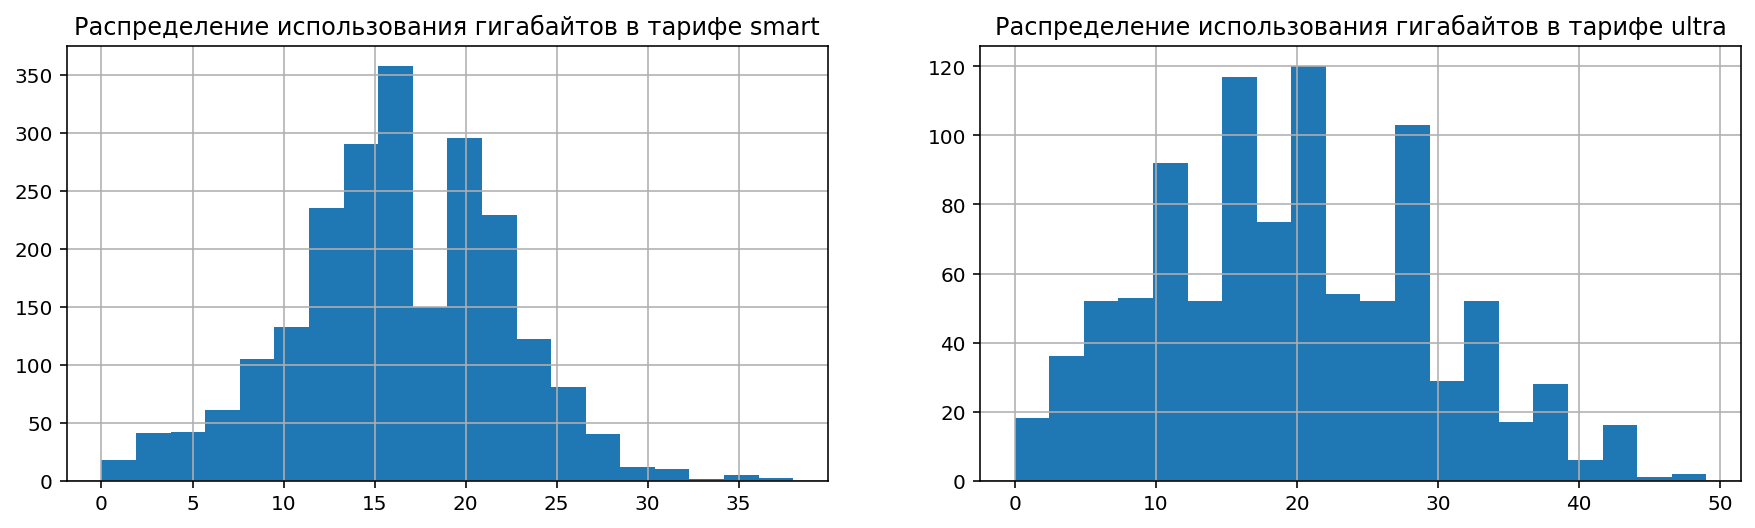

In [61]:
fig, axes = plt.subplots(1,2,figsize=(15,4))# постоение гистрограммы 

df_smart['gb_used'].hist(bins=20,ax=axes[0])
df_ultra['gb_used'].hist(bins=20, ax=axes[1])

axes[0].set_title('Распределение использования гигабайтов в тарифе smart')
axes[1].set_title('Распределение использования гигабайтов в тарифе ultra')

plt.show()

Нормальное распределение  гистограмм. Мода в тарифе смарт находится в пределах от 15 до 17. А в тарифе ультра в о 20 до 22. 

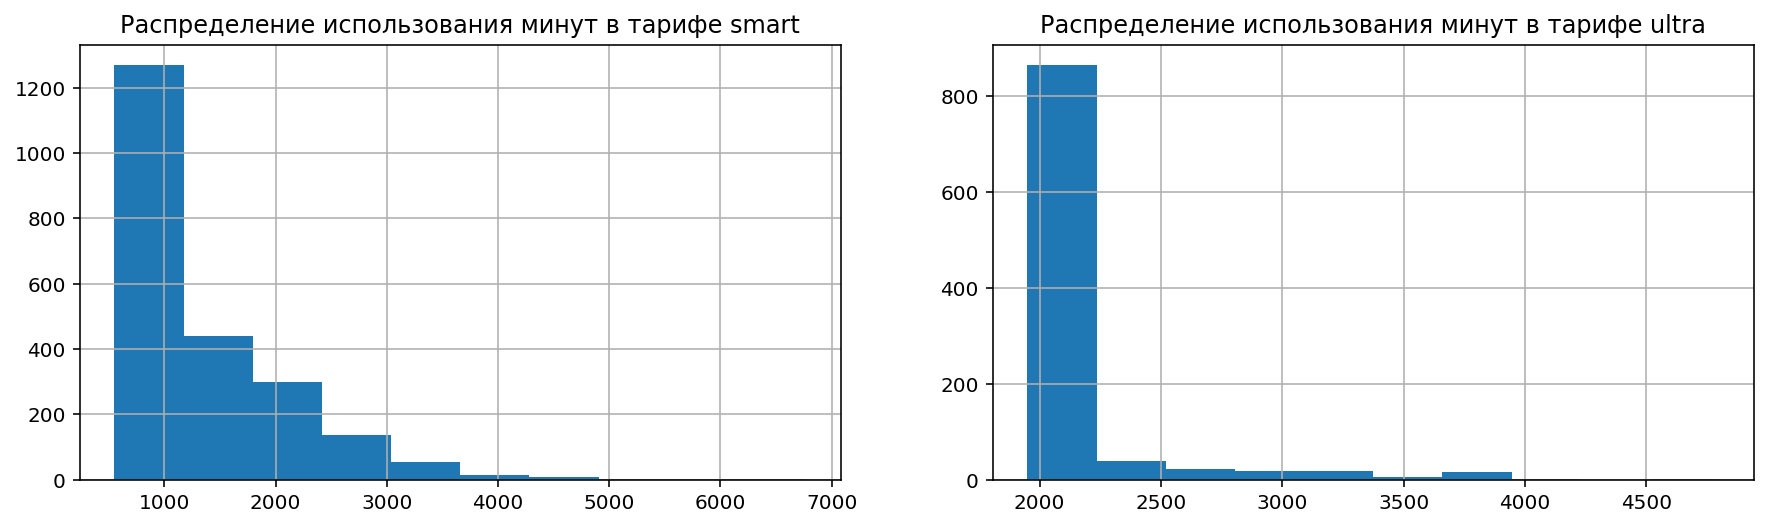

In [62]:
fig, axes = plt.subplots(1,2,figsize=(15,4))# постоение гистрограммы 

df_smart['revenue'].hist(ax=axes[0])
df_ultra['revenue'].hist(ax=axes[1])

axes[0].set_title('Распределение использования минут в тарифе smart')
axes[1].set_title('Распределение использования минут в тарифе ultra')

plt.show()

Обе гистограмма скошена в право.Мода по выручки в тарифе смарт варьируется от  550 до 1100. В тарифе ультра мода чуть выше от 1950 до 2200.

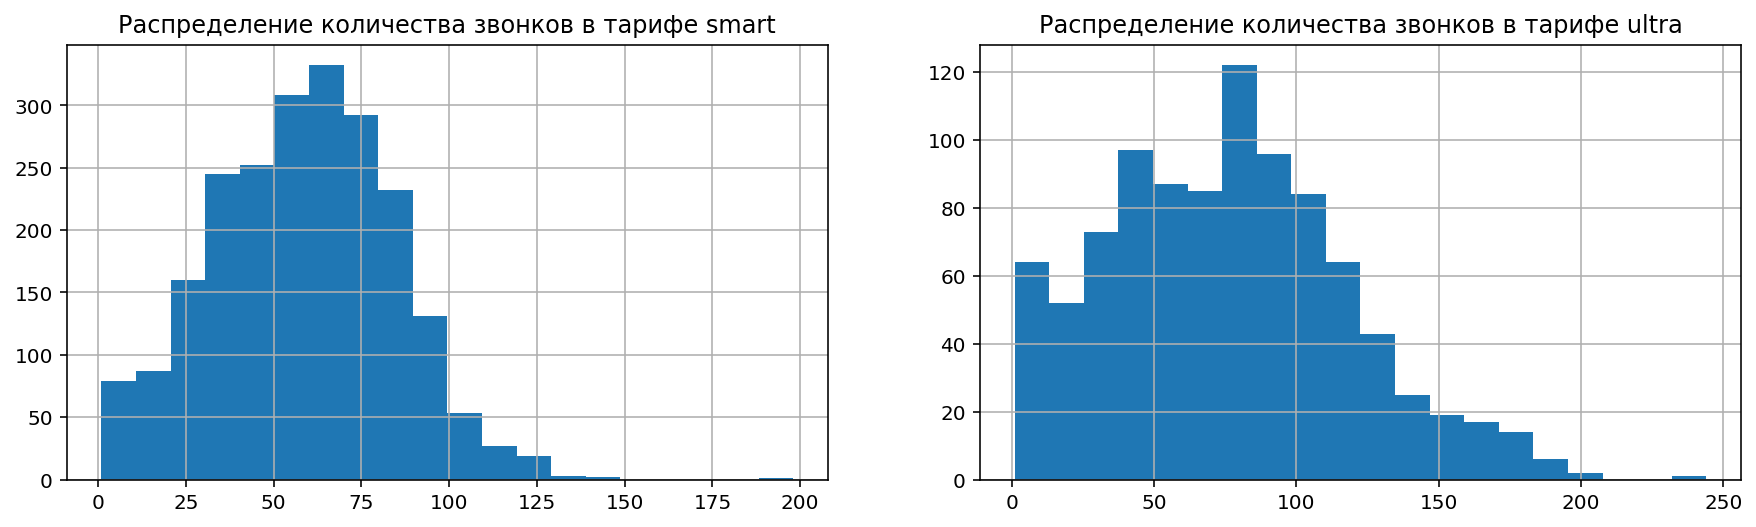

In [63]:
fig, axes = plt.subplots(1,2,figsize=(15,4))# постоение гистрограммы 

df_smart['duration_count'].hist(bins=20, ax=axes[0])
df_ultra['duration_count'].hist(bins=20, ax=axes[1])

axes[0].set_title('Распределение количества звонков в тарифе smart')
axes[1].set_title('Распределение количества звонков в тарифе ultra')

plt.show()

Гистограммы по количества произведенных звонков скошены влево. Наибольшее количесво звонков по тарифу смарт от 55 до 65. В тарифе ультра мода находится от 60 до 70. 

### Вывод

Чаще всего пользователь по тарифу `смарт` тратит:
*  минут от 450 до 500;
*  смс  от 15 до 30;
*  интернета от 15 до 17;
*  совершает звонков от 55 до 65 в месяц. 

Чаще всего пользователь по тарифу `ультра` тратит:
*  минут от 500 до 550;
*  смс  от 15 до 30;
*  интернета от 20 до 22;
*  совершает звонков от 60 до 70 в месяц. 

## Проверка гипотез

* Нулевая гипотеза Н0:  нет разница между средней выручкой пользователей тарифов `ультра` и `смарт`.
* Альтернативная гипотеза Н1 :  разница существует между средней выручкой пользователей тарифов `ультра` и `смарт`.


In [64]:
from scipy import stats as st

In [65]:
#гипотеза о равенстве средних двух  генеральных совокупностей
sample_1 = df.loc[(df['tariff'] == 'smart'),'revenue']
sample_2 = df.loc[(df['tariff'] == 'ultra'),'revenue']
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    sample_1, 
    sample_2,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Значение p-value низкое,поэтому гипотезу о равенстве отвергаем.Статистически значимая разница между двумя тарифами существует.

* Нулевая гипотеза Н0: средняя выручка пользователей из Москвы  от выручки пользователей из других регионов равна.
* Альтернативная гипотеза Н1 : средняя выручка пользователей из Москвы  от выручки пользователей из других регионов  не равна.

In [66]:
#гипотеза о равенстве средних двух  генеральных совокупностей
sample_1 = df.loc[(df['city'] == 'москва'),'revenue']
sample_2 = df.loc[(df['city'] != 'москва'),'revenue']
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    sample_1, 
    sample_2,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Значение p-value  получилось достоточно большим ,поэтому оснований отвергнуть нулевую гипотезу о равенстве долей нет. Средняя выручка различается незначимо.

### Вывод

Нулевая гипотеза о равенстве средней выручки между тарифами `ультра` и `смарт` не подтвердилось.  На уровне значимости 0.05 гипотеза о равенстве средней выручки пользователей из Москвы от выручки пользователей из других регионов подтвердилась.

## Общий вывод

На основе полученных данных можно сделать вывод, что:

1. Большая группа пользователей тарифа `смарт`  доплачивают за дополнительные услуги ,помимо установленного лимита. Чаще всего доплата происходит в категории `интернет`.

2. Зачастую пользователи тарифа `ультра` полностью не используют свой пакет услуг.

3. Пользователи похожи в категории сообщения.

4. Данные между средней выручкой  пользователей тарифов `ультра` и `смарт` различны.

5. Средняя выручка не зависит от местоположения пользователя.

6. Пользователей тарифом `ультра` на 45 % меньше, чем пользователей тарифом `смарт`



Утверждать точно по полученным данным какой тариф приносит больше денег не предоставляется возможным. Можно предположить,так как  в тарифе `смарт`, больше пользователей, нежели в тарифе `ультра`. А также пользователи тарифа `сматр` доплачивают за дополнительные гигабайты интернета, тариф `смарт` выглядит наиболее целесообразным для продвижения в рекламной компании.